## Stacking Ensemble Machine Learning With Python

In [1]:
#Loading Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from numpy import mean
from numpy import std

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
print(sklearn.__version__)

1.0.2


### Loading Dataset

In [2]:
from sklearn.datasets import load_iris
X,y=load_iris(return_X_y=True)

In [3]:
#remove low variance features
from sklearn.feature_selection import VarianceThreshold

selection=VarianceThreshold(threshold=(0.1))
X=selection.fit_transform(X)
X.shape

(150, 4)

### Data Spliting

In [4]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
xtrain.shape, xtest.shape

((120, 4), (30, 4))

In [6]:
ytrain.shape,ytest.shape

((120,), (30,))

### Build Stacked and Classification Models

In [7]:
#define estimators
# for Regression: StackingRegression; and classifier: StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


In [8]:
estimator_list=[('lr',LogisticRegression()),
                ('knn',KNeighborsClassifier(3)),
                ('dtc',DecisionTreeClassifier()),
                ('svm',SVC()),('gnb',GaussianNB()),
                ('rf',RandomForestClassifier()),
                ('mlp',MLPClassifier())
               ]

In [9]:
# evaluation the models
def evaluate_model(**kwargs):
    result=[]
    for name,model in kwargs.items():
        model=model.fit(xtrain,ytrain)
        y_train_pred = model.predict(xtrain)
        y_test_pred = model.predict(xtest)
        #train evaluation
        train_accuracy = accuracy_score(ytrain, y_train_pred)
        train_matthews_corrcoef = matthews_corrcoef(ytrain, y_train_pred) # Calculate MCC
        train_f1 = f1_score(ytrain, y_train_pred, average='weighted') # Calculate F1-score

        #test evaluation
        test_accuracy = accuracy_score(ytest, y_test_pred)
        test_matthews_corrcoef = matthews_corrcoef(ytest, y_test_pred) # Calculate MCC
        test_f1 = f1_score(ytest, y_test_pred, average='weighted') # Calculate F1-score

        x= {'Model_Name':name,
            'train_accuracy':train_accuracy, 
            'train_matthews_corrcoef':train_matthews_corrcoef,
            'train_f1':train_f1, 
            'test_accuracy':test_accuracy, 
            'test_matthews_corrcoef':test_matthews_corrcoef,
            'test_f1':test_f1}
        result.append(x)
    return result

In [10]:
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

In [11]:
model_result=evaluate_model(lr=LogisticRegression(),knn=KNeighborsClassifier(n_neighbors=3),
               dtc=DecisionTreeClassifier(),svm=SVC(),gnb=GaussianNB(),
               rf=RandomForestClassifier(),mlp=MLPClassifier(alpha=1, max_iter=1000),
               stack_model=StackingClassifier(estimators=estimator_list, final_estimator=LogisticRegression())
              )

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1)

In [12]:
model_result

[{'Model_Name': 'lr',
  'train_accuracy': 0.975,
  'train_matthews_corrcoef': 0.9634184941988289,
  'train_f1': 0.9749882794186592,
  'test_accuracy': 1.0,
  'test_matthews_corrcoef': 1.0,
  'test_f1': 1.0},
 {'Model_Name': 'knn',
  'train_accuracy': 0.95,
  'train_matthews_corrcoef': 0.9249843717441134,
  'train_f1': 0.95,
  'test_accuracy': 1.0,
  'test_matthews_corrcoef': 1.0,
  'test_f1': 1.0},
 {'Model_Name': 'dtc',
  'train_accuracy': 1.0,
  'train_matthews_corrcoef': 1.0,
  'train_f1': 1.0,
  'test_accuracy': 1.0,
  'test_matthews_corrcoef': 1.0,
  'test_f1': 1.0},
 {'Model_Name': 'svm',
  'train_accuracy': 0.975,
  'train_matthews_corrcoef': 0.9626002760850769,
  'train_f1': 0.975003906860447,
  'test_accuracy': 1.0,
  'test_matthews_corrcoef': 1.0,
  'test_f1': 1.0},
 {'Model_Name': 'gnb',
  'train_accuracy': 0.95,
  'train_matthews_corrcoef': 0.9249843717441134,
  'train_f1': 0.95,
  'test_accuracy': 1.0,
  'test_matthews_corrcoef': 1.0,
  'test_f1': 1.0},
 {'Model_Name': 'rf

In [16]:
df =pd.DataFrame(model_result)
df['Mean']=df.mean(axis=1)
df['Std']=df.std(axis=1)
df

/var/folders/70/xyz7khq54gx8qklx52wtt6tw0000gn/T/ipykernel_71243/1617112832.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Mean']=df.mean(axis=1)
/var/folders/70/xyz7khq54gx8qklx52wtt6tw0000gn/T/ipykernel_71243/1617112832.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Std']=df.std(axis=1)


,Model_Name,train_accuracy,train_matthews_corrcoef,train_f1,test_accuracy,test_matthews_corrcoef,test_f1,Mean,Std
0,lr,0.975000,0.963418,0.974988,1.0,1.0,1.0,0.985568,0.014939
1,knn,0.950000,0.924984,0.950000,1.0,1.0,1.0,0.970831,0.030338
2,dtc,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,0.000000
3,svm,0.975000,0.962600,0.975004,1.0,1.0,1.0,0.985434,0.015141
4,gnb,0.950000,0.924984,0.950000,1.0,1.0,1.0,0.970831,0.030338
5,rf,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,0.000000
6,mlp,0.983333,0.975412,0.983333,1.0,1.0,1.0,0.990346,0.010008
7,stack_model,0.991667,0.987603,0.991668,1.0,1.0,1.0,0.995156,0.005030


In this case, the stacking ensemble appears to perform better than any single model on average, achieving an accuracy of about 99.5 percent.

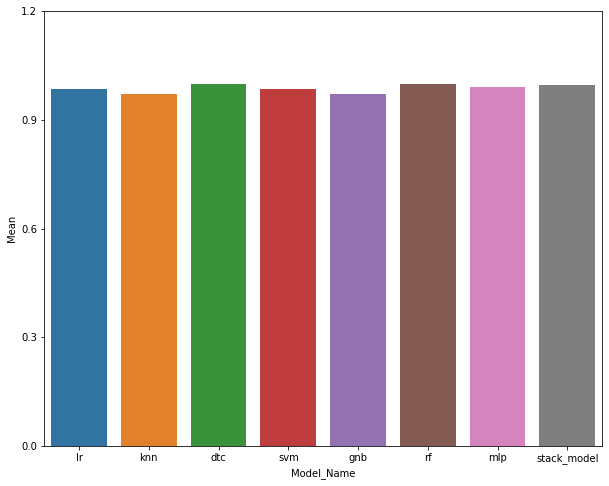

In [14]:
#Plot rpresent btween model and mean value
plt.figure(figsize=(10,8))
sns.barplot(x='Model_Name',y='Mean',data=df)
plt.yticks(np.arange(0, 1.5, step=0.3))
plt.show()

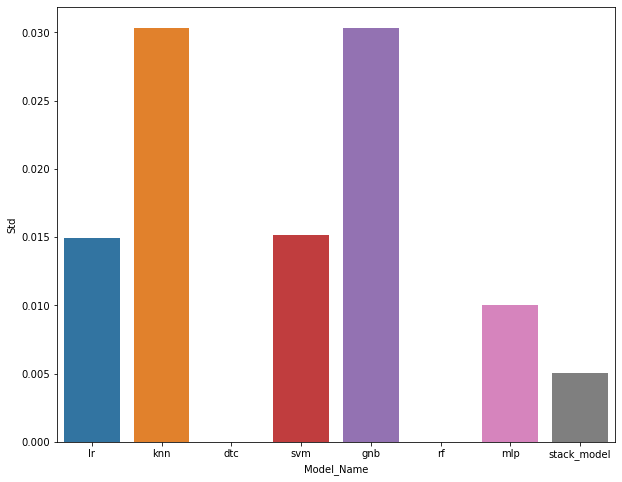

In [19]:
#Plot rpresent btween model and std value
plt.figure(figsize=(10,8))
sns.barplot(x='Model_Name',y='Std',data=df)
#plt.yticks(np.arange(0, 0.5, step=0.1))
plt.show()